In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread("apple.jpg", cv2.IMREAD_GRAYSCALE)

# Check
print(img.shape)


(630, 360)


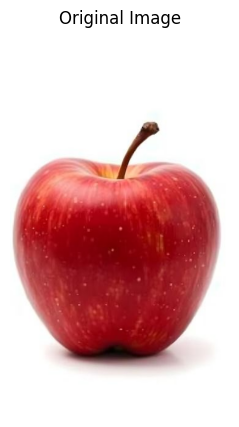

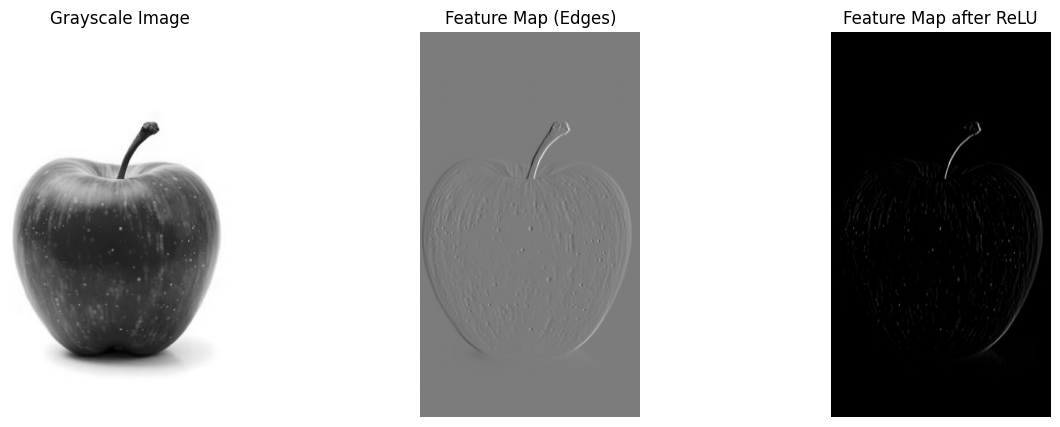

Before ReLU:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

After ReLU:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in color
img_color = cv2.imread("apple.jpg")              # Original color image
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Define 3x3 vertical edge kernel
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

# Convert to float BEFORE convolution
img_gray_f = img_gray.astype(np.float32)

# Apply convolution with float output
feature_map = cv2.filter2D(img_gray_f, cv2.CV_32F, kernel)




# Plot all three
plt.figure(figsize=(15,5))

# Original Color
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))  # Convert BGR → RGB for proper colors
plt.title("Original Image")
plt.axis('off')

def Relu(x):
    return np.maximum(0, x)

plt.figure(figsize=(15,5))

# Grayscale
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# Feature Map (Edges)
plt.subplot(1,3,2)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map (Edges)")
plt.axis('off')

# After ReLU
plt.subplot(1,3,3)
plt.imshow(Relu(feature_map), cmap='gray')
plt.title("Feature Map after ReLU")
plt.axis('off')

plt.show()

# pick a 5x5 region (you can change indices)
patch_before = feature_map[100:105, 100:105]
patch_after  = Relu(patch_before)

print("Before ReLU:")
print(patch_before)

print("\nAfter ReLU:")
print(patch_after)



Applying one convolutional layer(conv1):


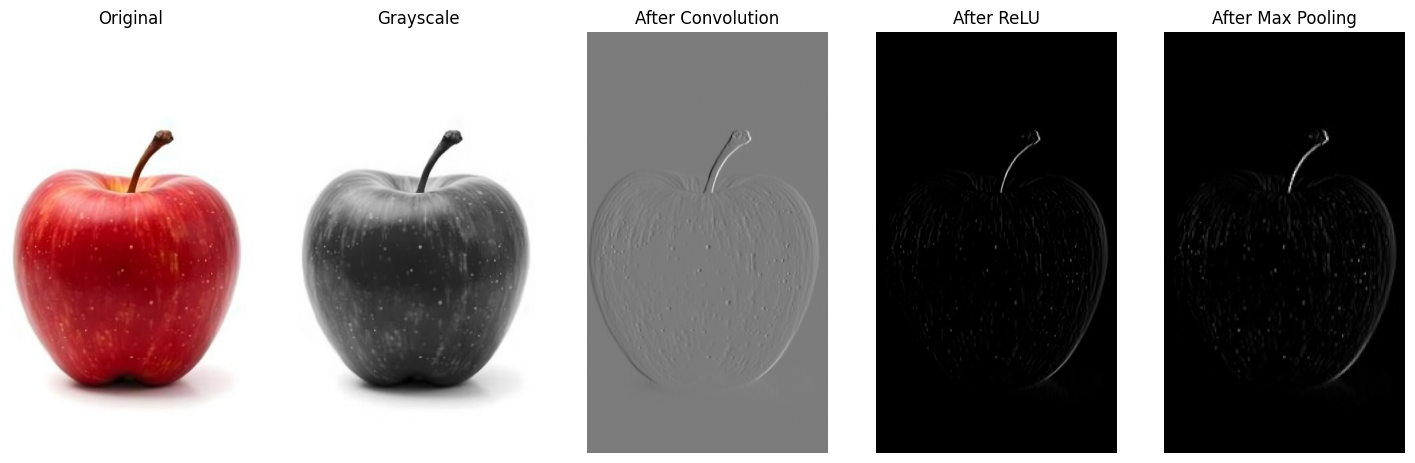

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in color

print("Applying one convolutional layer(conv1):")
img_color = cv2.imread("apple.jpg")              # Original color image
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

#vertical edge kernel
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

# Convert to float BEFORE convolution
img_gray_f = img_gray.astype(np.float32)

# Apply convolution with float output
feature_map = cv2.filter2D(img_gray_f, cv2.CV_32F, kernel)

def Relu(x):
    return np.maximum(0, x)



def max_pooling(img, size=2, stride=2):
    h, w = img.shape
    pooled = img.reshape(h//2, 2, w//2, 2).max(axis=(1,3))
    return pooled

pooled_map = max_pooling(Relu(feature_map))
plt.figure(figsize=(18,6))

# Original
plt.subplot(1,5,1)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

# Grayscale
plt.subplot(1,5,2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

# Convolution
plt.subplot(1,5,3)
plt.imshow(feature_map, cmap='gray')
plt.title("After Convolution")
plt.axis('off')

# ReLU
plt.subplot(1,5,4)
plt.imshow(Relu(feature_map), cmap='gray')
plt.title("After ReLU")
plt.axis('off')

# Pooling
plt.subplot(1,5,5)
plt.imshow(pooled_map, cmap='gray')
plt.title("After Max Pooling")
plt.axis('off')

plt.show()


Applying two convolutional layers(conv1,conv2):
conv1 outputs:


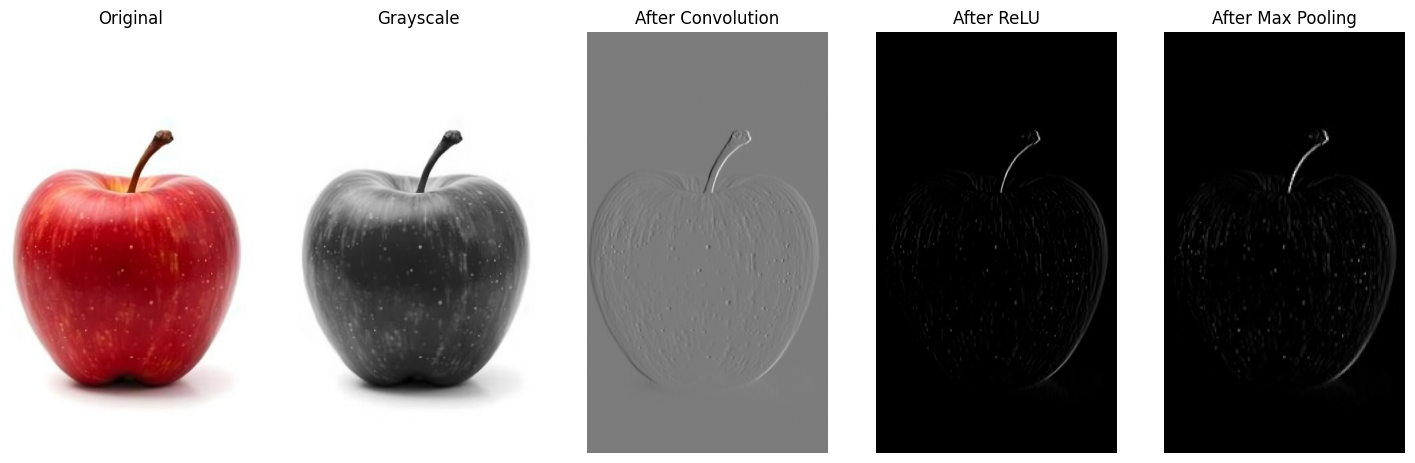

conv2 outputs:


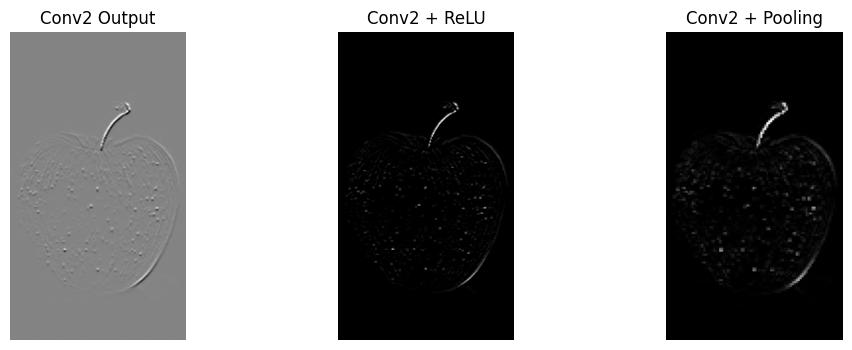

conv3 outputs:


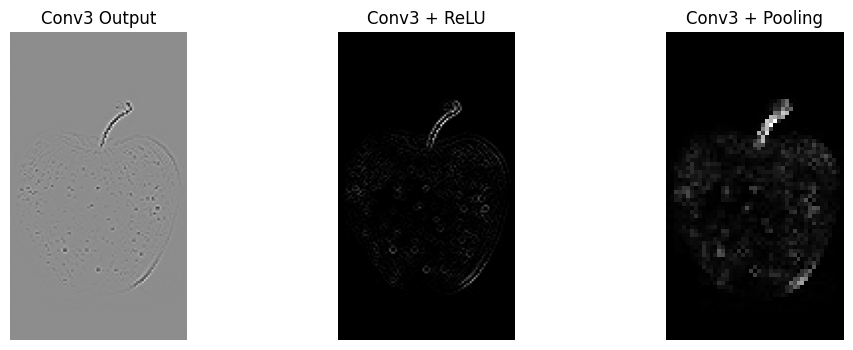

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in color

print("Applying two convolutional layers(conv1,conv2):")
img_color = cv2.imread("apple.jpg")              # Original color image
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

#vertical edge kernel
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

# Convert to float BEFORE convolution
img_gray_f = img_gray.astype(np.float32)

# Apply convolution with float output
feature_map = cv2.filter2D(img_gray_f, cv2.CV_32F, kernel)

def Relu(x):
    return np.maximum(0, x)

def max_pooling(img, size=2, stride=2):
    h, w = img.shape
    pooled = img.reshape(h//2, 2, w//2, 2).max(axis=(1,3))
    return pooled

pooled_map = max_pooling(Relu(feature_map))
plt.figure(figsize=(18,6))
print("conv1 outputs:")
# Original
plt.subplot(1,5,1)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

# Grayscale
plt.subplot(1,5,2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

# Convolution
plt.subplot(1,5,3)
plt.imshow(feature_map, cmap='gray')
plt.title("After Convolution")
plt.axis('off')

# ReLU
plt.subplot(1,5,4)
plt.imshow(Relu(feature_map), cmap='gray')
plt.title("After ReLU")
plt.axis('off')

# Pooling
plt.subplot(1,5,5)
plt.imshow(pooled_map, cmap='gray')
plt.title("After Max Pooling")
plt.axis('off')

plt.show()

print("conv2 outputs:")

# Example conv2 kernel (horizontal edges)
kernel2 = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

# Apply conv2 on pooled output
conv2_map = cv2.filter2D(pooled_map.astype(np.float32),
                          cv2.CV_32F,
                          kernel2)
def max_pooling(img, size=2, stride=2):
    h, w = img.shape

    # crop if dimensions are odd
    h_crop = (h // size) * size
    w_crop = (w // size) * size
    img = img[:h_crop, :w_crop]

    pooled = img.reshape(h_crop//size, size,
                          w_crop//size, size).max(axis=(1,3))
    return pooled

relu2_map = Relu(conv2_map)
pooled2_map = max_pooling(relu2_map)
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(conv2_map, cmap='gray')
plt.title("Conv2 Output")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(relu2_map, cmap='gray')
plt.title("Conv2 + ReLU")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(pooled2_map, cmap='gray')
plt.title("Conv2 + Pooling")
plt.axis('off')

plt.show()


print("conv3 outputs:")

# conv3 kernel (diagonal / texture-like)
kernel3 = np.array([
    [ 0,  1,  0],
    [ 1, -4,  1],
    [ 0,  1,  0]
], dtype=np.float32)

conv3_map = cv2.filter2D(pooled2_map.astype(np.float32),
                          cv2.CV_32F,
                          kernel3)

relu3_map = Relu(conv3_map)
pooled3_map = max_pooling(relu3_map)
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(conv3_map, cmap='gray')
plt.title("Conv3 Output")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(relu3_map, cmap='gray')
plt.title("Conv3 + ReLU")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(pooled3_map, cmap='gray')
plt.title("Conv3 + Pooling")
plt.axis('off')

plt.show()



Applying two convolutional layers(conv1,conv2):
conv1 outputs:


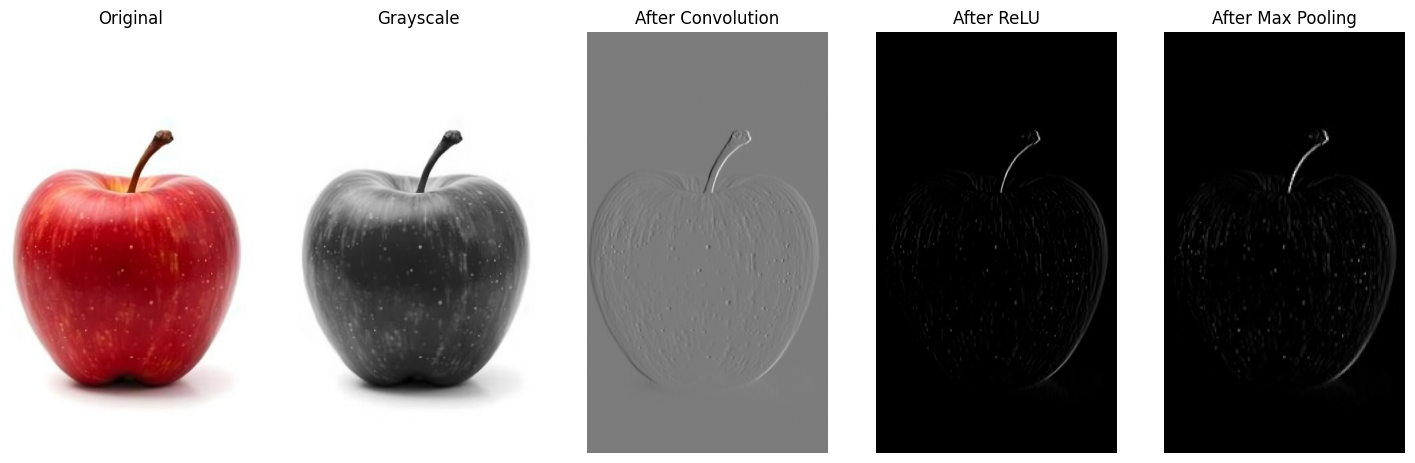

conv2 outputs:


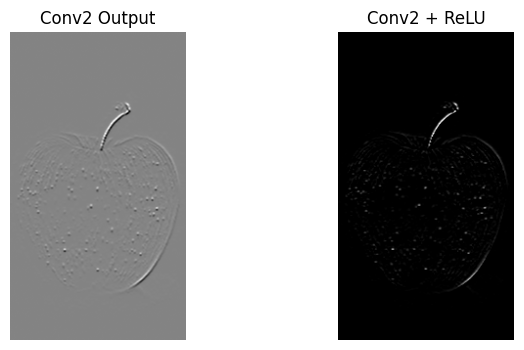

conv3 outputs:


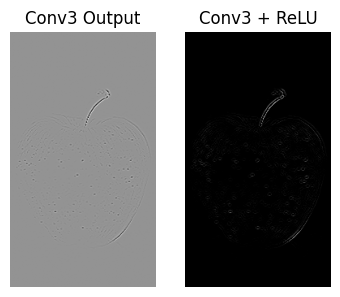

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in color

print("Applying two convolutional layers(conv1,conv2):")
img_color = cv2.imread("apple.jpg")              # Original color image
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

#vertical edge kernel
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

# Convert to float BEFORE convolution
img_gray_f = img_gray.astype(np.float32)

# Apply convolution with float output
feature_map = cv2.filter2D(img_gray_f, cv2.CV_32F, kernel)

def Relu(x):
    return np.maximum(0, x)

def max_pooling(img, size=2, stride=2):
    h, w = img.shape
    pooled = img.reshape(h//2, 2, w//2, 2).max(axis=(1,3))
    return pooled

pooled_map = max_pooling(Relu(feature_map))
plt.figure(figsize=(18,6))
print("conv1 outputs:")
# Original
plt.subplot(1,5,1)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

# Grayscale
plt.subplot(1,5,2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

# Convolution
plt.subplot(1,5,3)
plt.imshow(feature_map, cmap='gray')
plt.title("After Convolution")
plt.axis('off')

# ReLU
plt.subplot(1,5,4)
plt.imshow(Relu(feature_map), cmap='gray')
plt.title("After ReLU")
plt.axis('off')

# Pooling
plt.subplot(1,5,5)
plt.imshow(pooled_map, cmap='gray')
plt.title("After Max Pooling")
plt.axis('off')

plt.show()

print("conv2 outputs:")

# Example conv2 kernel (horizontal edges)
kernel2 = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

# Apply conv2 on pooled output
conv2_map = cv2.filter2D(pooled_map.astype(np.float32),
                          cv2.CV_32F,
                          kernel2)
def max_pooling(img, size=2, stride=2):
    h, w = img.shape

    # crop if dimensions are odd
    h_crop = (h // size) * size
    w_crop = (w // size) * size
    img = img[:h_crop, :w_crop]

    pooled = img.reshape(h_crop//size, size,
                          w_crop//size, size).max(axis=(1,3))
    return pooled

relu2_map = Relu(conv2_map)
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(conv2_map, cmap='gray')
plt.title("Conv2 Output")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(relu2_map, cmap='gray')
plt.title("Conv2 + ReLU")
plt.axis('off')

plt.show()


print("conv3 outputs:")

# conv3 kernel (diagonal / texture-like)
kernel3 = np.array([
    [ 0,  1,  0],
    [ 1, -4,  1],
    [ 0,  1,  0]
], dtype=np.float32)


# conv3 uses relu2_map directly
conv3_map = cv2.filter2D(relu2_map, cv2.CV_32F, kernel3)


relu3_map = Relu(conv3_map)

plt.subplot(1,3,1)
plt.imshow(conv3_map, cmap='gray')
plt.title("Conv3 Output")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(relu3_map, cmap='gray')
plt.title("Conv3 + ReLU")
plt.axis('off')


plt.show()



Applying two convolutional layers(conv1,conv2):


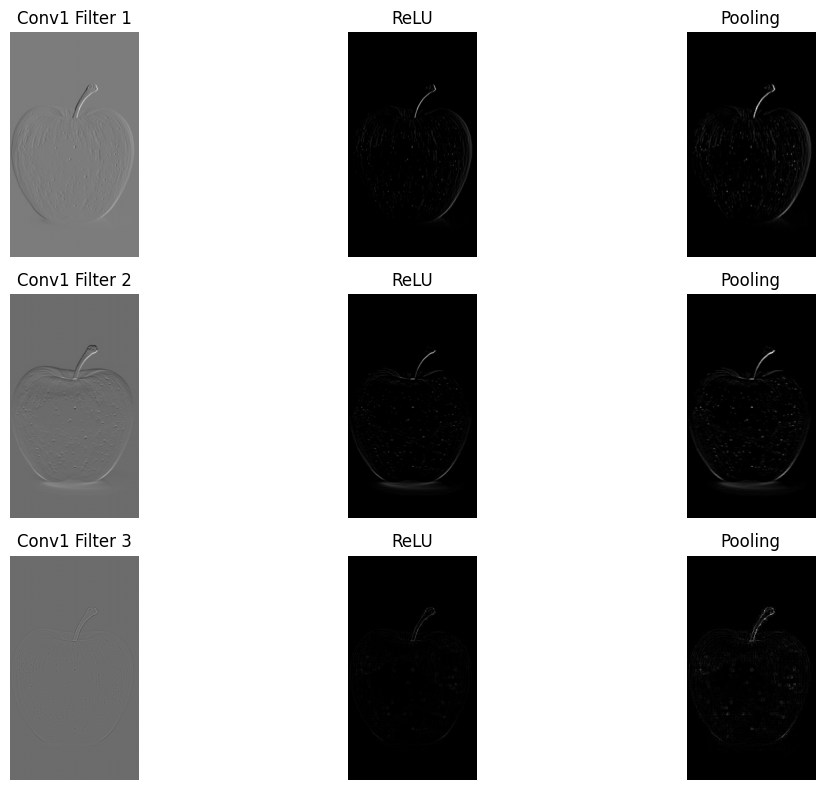

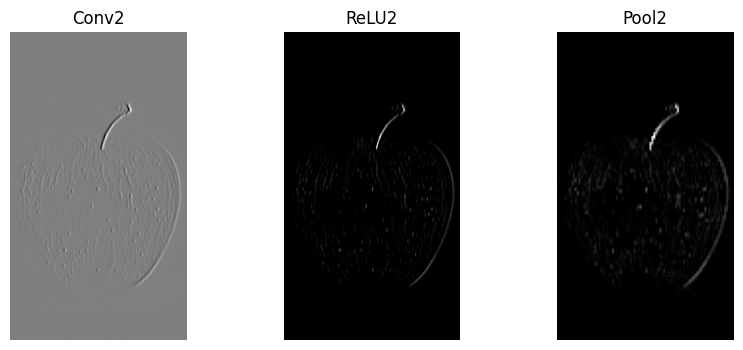

Flattened size: (127170,)
Class probabilities: [1.00000000e+000 4.57524676e-121]
Prediction: apple


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in color

print("Applying two convolutional layers(conv1,conv2):")
img_color = cv2.imread("apple.jpg")              # Original color image
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
kernels = [
    np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 1]], dtype=np.float32),   # vertical edges

    np.array([[-1, -2, -1],
              [ 0,  0,  0],
              [ 1,  2,  1]], dtype=np.float32), # horizontal edges

    np.array([[ 0,  1,  0],
              [ 1, -4,  1],
              [ 0,  1,  0]], dtype=np.float32)  # center / texture
]
img_gray_f = img_gray.astype(np.float32)

def Relu(x):
    return np.maximum(0, x)

def max_pooling(img, size=2, stride=2):
    h, w = img.shape


    h_crop = (h // size) * size
    w_crop = (w // size) * size
    img = img[:h_crop, :w_crop]

    pooled = img.reshape(h_crop//size, size,
                          w_crop//size, size).max(axis=(1,3))
    return pooled


conv1_maps = []
relu1_maps = []
pool1_maps = []

for k in kernels:
    conv = cv2.filter2D(img_gray_f, cv2.CV_32F, k)
    relu = Relu(conv)
    pool = max_pooling(relu)

    conv1_maps.append(conv)
    relu1_maps.append(relu)
    pool1_maps.append(pool)
img_gray_f = img_gray.astype(np.float32)

plt.figure(figsize=(12,8))

for i in range(len(kernels)):
    plt.subplot(3,3,i*3 + 1)
    plt.imshow(conv1_maps[i], cmap='gray')
    plt.title(f"Conv1 Filter {i+1}")
    plt.axis('off')

    plt.subplot(3,3,i*3 + 2)
    plt.imshow(relu1_maps[i], cmap='gray')
    plt.title("ReLU")
    plt.axis('off')

    plt.subplot(3,3,i*3 + 3)
    plt.imshow(pool1_maps[i], cmap='gray')
    plt.title("Pooling")
    plt.axis('off')

plt.tight_layout()
plt.show()



# ---- Conv2 kernels (one 3x3 kernel per Conv1 map) ----
kernel2 = [
    np.array([[ 1,  0, -1],
              [ 1,  0, -1],
              [ 1,  0, -1]], dtype=np.float32),

    np.array([[ 1,  1,  1],
              [ 0,  0,  0],
              [-1, -1, -1]], dtype=np.float32),

    np.array([[ 0,  1,  0],
              [ 1, -4,  1],
              [ 0,  1,  0]], dtype=np.float32)
]
# ---- Conv2 operation (true multi-channel convolution) ----
conv2_maps = []
relu2_maps = []
pool2_maps = []

for fmap in pool1_maps:          # input channels
    for k in kernel2:             # conv2 filters
        conv = cv2.filter2D(fmap.astype(np.float32),
                            cv2.CV_32F,
                            k)
        relu = Relu(conv)
        pool = max_pooling(relu)

        conv2_maps.append(conv)
        relu2_maps.append(relu)
        pool2_maps.append(pool)

plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(conv2_maps[0], cmap='gray')
plt.title("Conv2")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(relu2_maps[0], cmap='gray')
plt.title("ReLU2")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(pool2_maps[0], cmap='gray')
plt.title("Pool2")
plt.axis('off')

plt.show()

flattened = np.concatenate([m.flatten() for m in pool2_maps])
print("Flattened size:", flattened.shape)
num_neurons = 2   # apple / not apple

W = np.random.randn(num_neurons, flattened.shape[0]) * 0.01
b = np.zeros(num_neurons)

dense_out = np.dot(W, flattened) + b
def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum()

output = softmax(dense_out)
classes = ["apple", "not apple"]
prediction = classes[np.argmax(output)]

print("Class probabilities:", output)
print("Prediction:", prediction)
